In [510]:
import pandas as pd 
import numpy as np
import matplotlib.pylab as plt
import warnings
warnings.simplefilter('ignore')

In [4]:
with open('Все идет по плану.txt', 'r', encoding='utf-8') as file:
    file = file.read()

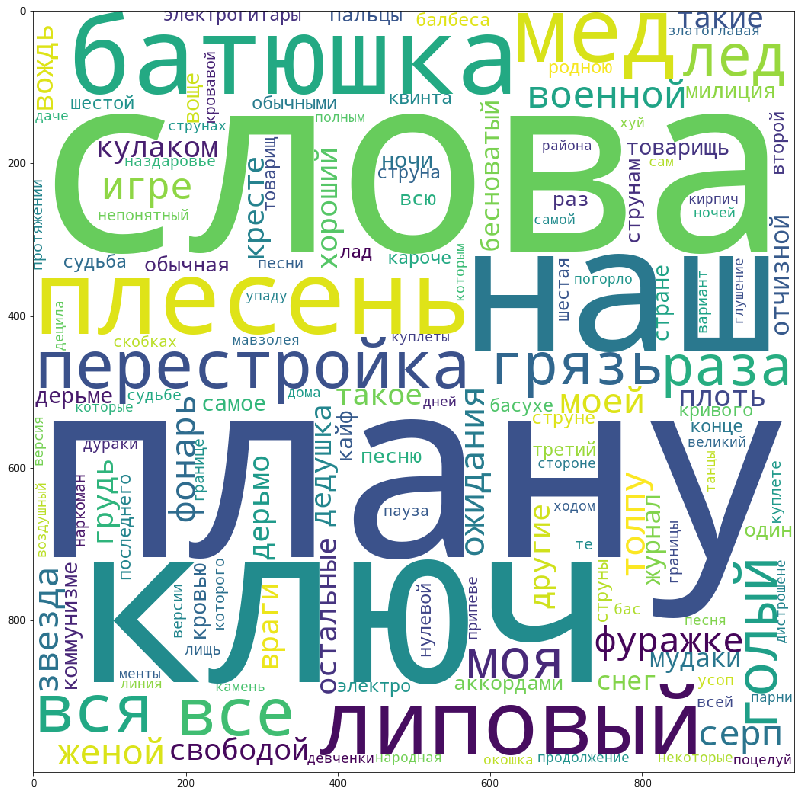

In [522]:
from nltk import word_tokenize
from collections import Counter
from wordcloud import WordCloud, STOPWORDS
import pymorphy2
morph = pymorphy2.MorphAnalyzer()

a = ord('а')
russian = ''.join([chr(i) for i in range(a, a+32)])

words = word_tokenize(file)

russian_words = []
for word in words:
    flag = True
    for char in word:
        if char not in russian:
            flag = False
            break
    if flag:
        russian_words.append(word)

russian_words = [word for word in russian_words
                 if ('NOUN' in morph.parse(word)[0].tag) or
                    ('ADJF' in morph.parse(word)[0].tag)]

cloud = Counter(russian_words)

stopwords = set(STOPWORDS)
cloud = ' '.join(cloud)
wordcloud = WordCloud(width = 1000, height = 1000, 
                      stopwords = stopwords, 
                      min_font_size = 8,background_color='white'
                      ).generate(cloud)


plt.figure(figsize = (14, 14)) 
plt.imshow(wordcloud)
pass

In [482]:
import random
import importlib as imp

from algorithm import naive
from algorithm import rabin_karp
from utils import tools

tools      = imp.reload(tools) 
rabin_karp = imp.reload(rabin_karp) 
naive      = imp.reload(naive) 

len_candidate = 3
len_reference = 150
dictionary    = ['a', 'b', 'c', 'd']

reference = tools.gen_random_string(dictionary, len_reference)
candidate = tools.gen_random_string(dictionary, len_candidate)

print('Reference: {}'.format(reference))
print('Candidate: {}'.format(candidate))

# alg = rabin_karp.RabinKarp(reference)
alg = naive.BruteForce(reference)
alg.set_candidate(candidate)
offset_lst = alg.search(multiple_search=True)

print('Indexes:   {}'.format(offset_lst))

reference = list(reference)
i = 0 
for offset in offset_lst:
    ofst = offset + i
    reference.insert(ofst, '_')
    for i_char in range(len_candidate):
        reference[ofst + i_char + 1] = reference[ofst + i_char + 1].upper()
    reference.insert(ofst + len_candidate + 1, '_')
    i += 2
reference = ''.join(reference)
print('Result:    {}'.format(reference))

Reference: cbddbacdcbcdddbabdadbdcbacccdcacdddcbccacababbbabcbaabbbcaaddbbcdabacadbabbbbbdbbdaaabaddaccbddaadddcaadbacbadddaadcbdadcdcbdaaaadbbadadcbdadbcacaabda
Candidate: ddd
Indexes:   [11, 32, 97, 109]
Result:    cbddbacdcbc_DDD_babdadbdcbacccdcac_DDD_cbccacababbbabcbaabbbcaaddbbcdabacadbabbbbbdbbdaaabaddaccbddaa_DDD_caadbacba_DDD_aadcbdadcdcbdaaaadbbadadcbdadbcacaabda


In [479]:
%%time
from utils import tools
tools = imp.reload(tools)

algorithms     = [naive.BruteForce, rabin_karp.RabinKarp]
set_params     = [{}, {}]
reference_len  = np.arange(1000, 100000, 600).tolist()
dictionary     = ['a', 'b', 'c']
n_observations = 5
coef           = 0.001


info_df = tools.generate_stat(  algorithms=algorithms,
                                set_params=set_params,
                                gen_string=tools.gen_random_string,
                                dictionary=dictionary,
                                reference_len=reference_len,
                                candidate_len=[round(rlen * coef) for rlen in  reference_len],
                                n_observations=n_observations)

Brute Force
Rabin-Karp
Wall time: 27.5 s


In [481]:
stat_df         = info_df.groupby(['algorithm', 'reference_len']).agg({'execution':['mean','std']})
stat_df.columns = ['execution mean', 'execution std']
stat_df         = stat_df.reset_index()

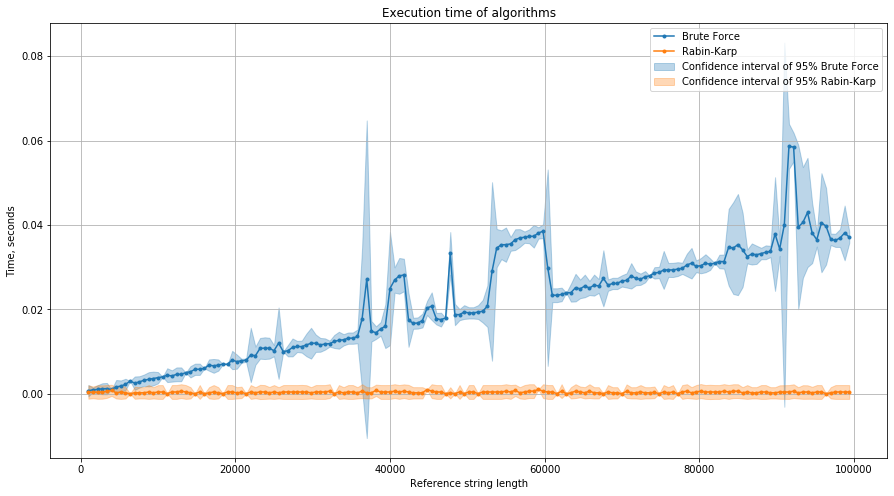

In [489]:
tools = imp.reload(tools)
tools.get_plots(stat_df, figsize=(15, 8))